In [1]:
'''This notebook models the percent length estimation error
under rotation'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import seaborn as sns

from dblib import mssql

sns.set()

#gey = ["#FFFFFF", "#999999", "#666666", "#333333", "#000000"]
#grey = ["#FFFFFF", "#111111"]
#sns.set_palette(sns.color_palette("cubehelix", 8))

sns.set(font="Times New Roman", font_scale=1.1)
sns.set_style('ticks', rc={'axes.grid':True})
#sns.despine()

In [2]:
sql = "" \
"select sample_lengthid ,cnn as CNN ,status" \
",case when transform='hflip' then 'horizontal flip' else 'none' end as transform ,accuracy as Score ,IoU*100 as [% IoU]" \
" from  v_mv_long_form" \
" where not accuracy is null and status='Success' and (transform='None' or transform='hflip') and accuracy>0.5"


with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)

['sample_lengthid', 'CNN', 'status', 'transform', 'Score', '% IoU']

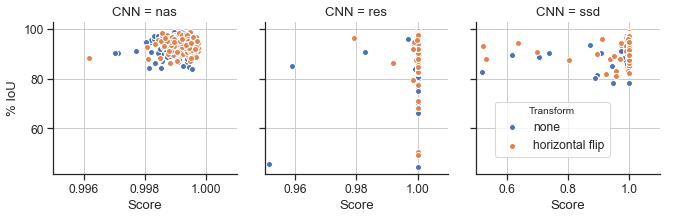

In [9]:
inch = 2.54
h = 8 / inch
g = sns.FacetGrid(df, col="CNN",  hue="transform", sharex=False, sharey=True, height=h, aspect=1, hue_kws=dict(marker=["o", "o"]) )
g = (g.map(plt.scatter, "Score", "% IoU", edgecolor="w"))

ax_nas = g.facet_axis(0,0); ax_res = g.facet_axis(0,1); ax_ssd = g.facet_axis(0,2)

#ax_nas.set_xlim(0.99, 1.001)
#ax_res.set_xlim(0.90, 1.01)
#ax_ssd.set_xlim(0.5, 1.1)

ax_nas.set_xlim(0.995, 1.001)
ax_res.set_xlim(0.95, 1.01)
ax_ssd.set_xlim(0.5, 1.1)


plt.legend(loc=(0.1,0.115), title='Transform')
#ax_nas.set_ylim(0.4, 1.0)
#ax_res.set_xlim(0.95, 1.0)
#ax_ssd.set_xlim(0, 1.0)
plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/iou_vs_accuracy.png', dpi=600)
plt.savefig(r'C:\Users\Graham Monkman\OneDrive\Documents\PHD\My Papers\Fiducial_machine_vision_estimates\journal\methods_ee\mee_figs\fig2.png', dpi=600)

plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/iou_vs_accuracy.svg')

In [ ]:
#FEW AVERAGES

In [7]:
from scipy import stats
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def mse(pred):
    def mse_(est):
        ndpred = np.zeros(est.shape[0]) + pred
        return mean_squared_error(ndpred, est)
    mse_.__name__ = 'mse_%s' % pred
    return mse_

def ci(data):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + 0.95) / 2., n-1)
    s = 'M=%0.1f 95%% CIs [%0.1f, %0.1f]' % (m, m-h, m+h)
    #return m, m-h, m+h
    return s

In [4]:
list(df)

['sample_lengthid', 'CNN', 'status', 'transform', 'Score', '% IoU']

In [8]:
df.groupby(['transform']).agg({'% IoU':[np.mean, ci]})

% IoU                             
                      mean                           ci
transform                                              
horizontal flip  93.200719  M=93.2 95% CIs [93.0, 93.4]
none             92.750950  M=92.8 95% CIs [92.5, 93.0]